<a href="https://colab.research.google.com/github/Sinha123456/Visualization/blob/main/pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Description:

That data is downloaded from Udacity class room. That data is based on the game called pokemon, you can play on your phone.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import rcParams

In [3]:
# Read the csv file, and check its top 5 rows
pokemon = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/udacity_projects/pokemon.csv')
print(pokemon.shape)
pokemon.head()


(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


Assessing Data

In [4]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               807 non-null    int64  
 1   species          807 non-null    object 
 2   generation_id    807 non-null    int64  
 3   height           807 non-null    float64
 4   weight           807 non-null    float64
 5   base_experience  807 non-null    int64  
 6   type_1           807 non-null    object 
 7   type_2           405 non-null    object 
 8   hp               807 non-null    int64  
 9   attack           807 non-null    int64  
 10  defense          807 non-null    int64  
 11  speed            807 non-null    int64  
 12  special-attack   807 non-null    int64  
 13  special-defense  807 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 88.4+ KB


In [5]:
pokemon.isnull().sum()

id                   0
species              0
generation_id        0
height               0
weight               0
base_experience      0
type_1               0
type_2             402
hp                   0
attack               0
defense              0
speed                0
special-attack       0
special-defense      0
dtype: int64

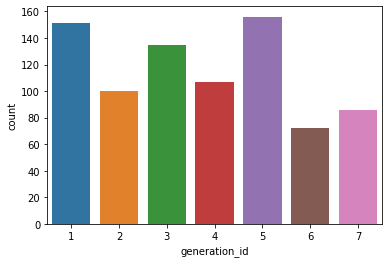

In [6]:
sns.countplot(data=pokemon, x='generation_id');

In [7]:
# Choose the first tuple of RGB colors
base_color = sns.color_palette()[0]


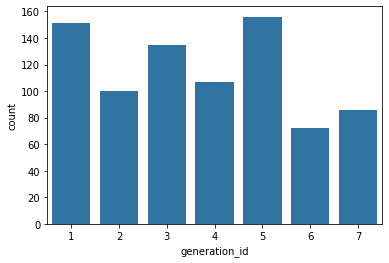

In [8]:
# Use the `color` argument
sns.countplot(data=pokemon, x='generation_id', color=base_color);

genration 1 and 5 are in higher count and genration 6, 7 are in lower coount in the countplot.

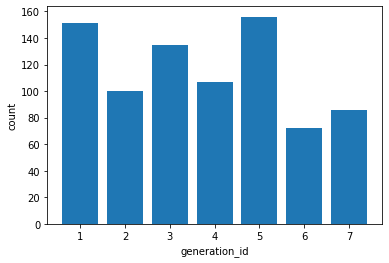

In [9]:
# Return the Series having unique values
x = pokemon['generation_id'].unique()

# Return the Series having frequency count of each unique value
y = pokemon['generation_id'].value_counts(sort=False)

plt.bar(x, y)

# Labeling the axes
plt.xlabel('generation_id')
plt.ylabel('count')

# Dsiplay the plot
plt.show()

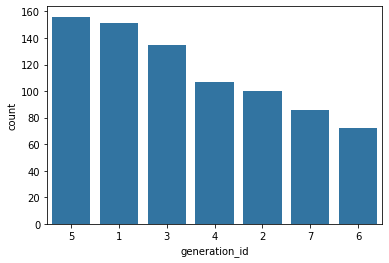

In [10]:
# Static-ordering the bars
sns.countplot(data=pokemon, x='generation_id', color=base_color, order=[5,1,3,4,2,7,6]);

# Dynamic-ordering the bars
# The order of the display of the bars can be computed with the following logic.
# Count the frequency of each unique value in the 'generation_id' column, and sort it in descending order
# Returns a Series
freq = pokemon['generation_id'].value_counts()

# Get the indexes of the Series
gen_order = freq.index

# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sns.countplot(data=pokemon, x='generation_id', color=base_color, order=gen_order);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

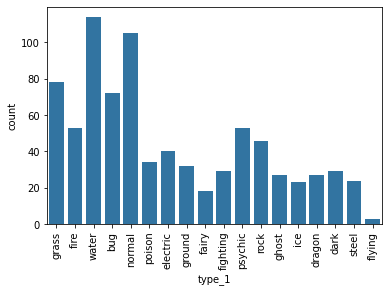

In [11]:
# Plot the Pokemon type on a Vertical bar chart
sns.countplot(data=pokemon, x='type_1', color=base_color);

# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90)

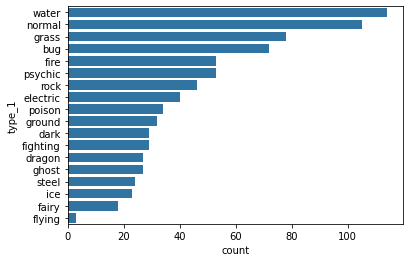

In [12]:
# Plot the Pokemon type on a Horizontal bar chart
type_order = pokemon['type_1'].value_counts().index
sns.countplot(data=pokemon, y='type_1', color=base_color, order=type_order);

Wrangling data:

In [13]:
pkmn_types = pokemon.melt(id_vars=['id', 'species'], 
                          value_vars=['type_1', 'type_2'], 
                          var_name='type_level', 
                          value_name='type')
pkmn_types.head(10)

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


In [14]:
type_counts = pkmn_types.type.value_counts()
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
fire         64
ground       64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

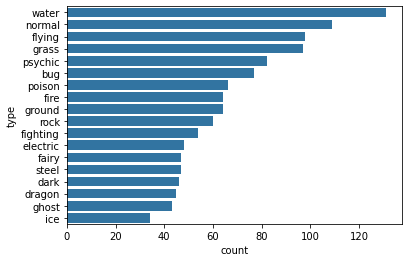

In [15]:
#Plot the horizontal bar charts
type_order = type_counts.index
base_color= sns.color_palette()[0]
sns.countplot(data = pkmn_types, y = 'type', order = type_order, color = base_color )
plt.show()

Plot a bar chart having the proportions, instead of the actual count, on one of the axes.


In [16]:
# Find the maximum proportion of bar
# Returns the sum of all not-null values in `type` column
n_pokemon = pkmn_types['type'].value_counts().sum()
n_pokemon

1212

In [17]:
# Return the highest frequency in the `type` column
max_type_count = type_counts[0]
max_type_count

131

In [18]:
# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_type_count / n_pokemon
print(max_prop)

0.10808580858085809


In [19]:
# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
# between 0 and max_prop, with a step size 2\%
tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

Create a list of String values that can be used as tick labels.

In [20]:
# Use a list comprehension to create tick_names that we will apply to the tick labels. 
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` is used to represent floating point number.
# Refer [here](https://docs.python.org/2/library/string.html#format-string-syntax) for more details
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

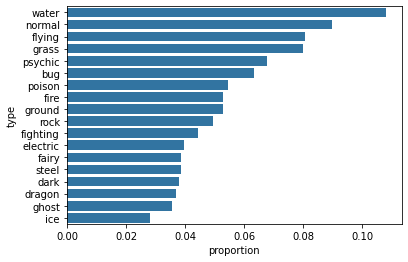

In [21]:
# Plot the bar chart, with new x-tick labels
sns.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);
# Change the tick locations and labels
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');

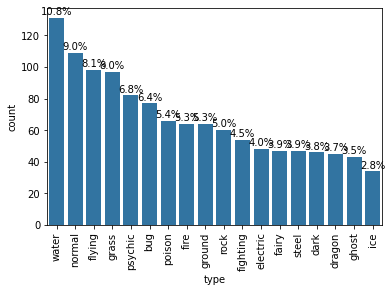

In [22]:
# Considering the same chart from the Example 1 above, print the text (proportion) BELOW the bars
base_color = sns.color_palette()[0]
sns.countplot(data=pkmn_types, x='type', color=base_color, order=type_order);
rcParams['figure.figsize'] = 12,4


# Recalculating the type_counts just to have clarity.
type_counts = pkmn_types['type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)

    # print the annotation just below the top of the bar
    
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

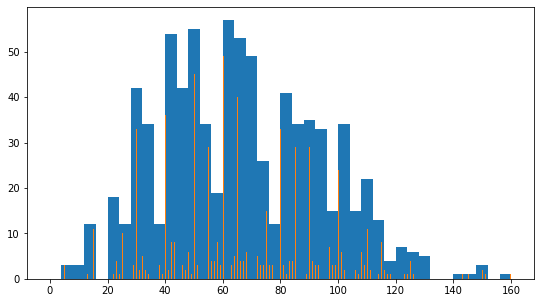

In [23]:
plt.figure(figsize=[20,5])
# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1,2,1)
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins=bins)
# histogram on right, example of too-small bin size
#plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

Scale the x-axis to log-type, change the axis limits, and increase the x-ticks

In [24]:
pokemon['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

In [25]:
np.log10(pokemon['weight'].describe()) #min weight is 1 and max weight is 3, we choose ticks according these values

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

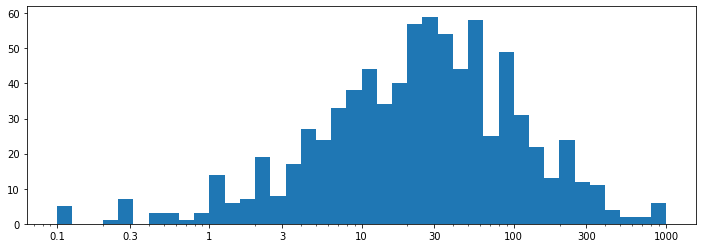

In [26]:
# Get the ticks for bins between [0 - maximum weight]
bins = 10 ** np.arange(-1, 3+0.1, 0.1)

# Generate the x-ticks you want to apply
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

# Plot the histogram
plt.hist(data=pokemon, x='weight', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

# Apply x-ticks                      #It is important that the xticks are specified after xscale since that function has its own built-in tick settings.
plt.xticks(ticks, labels);

Custom scaling the given data Series, instead of using the built-in log scale

(array([ 23.,  71., 105.,  95.,  91.,  99.,  61.,  61.,  34.,  40.,  28.,
         15.,  13.,   8.,  19.,   8.,   6.,   6.,   9.,   1.,   3.,   1.,
          1.,   1.,   0.,   0.,   1.,   1.,   1.,   1.,   2.,   2.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32.]),
 <a list of 32 Patch objects>)

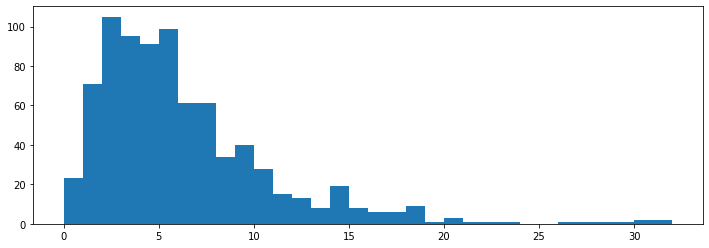

In [27]:
def sqrt_trans(x, inverse = False):
  if not inverse:
    return np.sqrt(x)
  else:
    return x**2
  
bin_edges = np.arange(0, sqrt_trans(pokemon['weight']).max()+1, 1)
#plot the scaled data

plt.hist(pokemon['weight'].apply(sqrt_trans), bins = bin_edges)

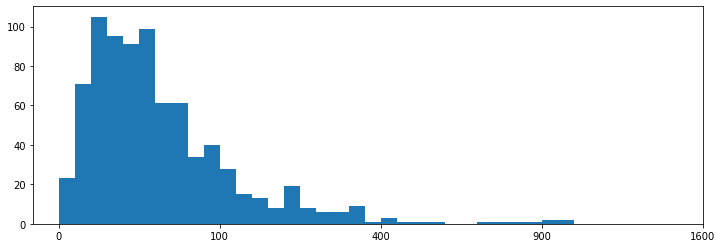

In [28]:
#using xticks
# Identify the tick-locations
plt.hist(pokemon.weight.apply(sqrt_trans), bins = bin_edges)
tick_locs = np.arange(0, sqrt_trans(pokemon.weight.max())+10, 10)
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse=True).astype(int))
plt.show()

## Displot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


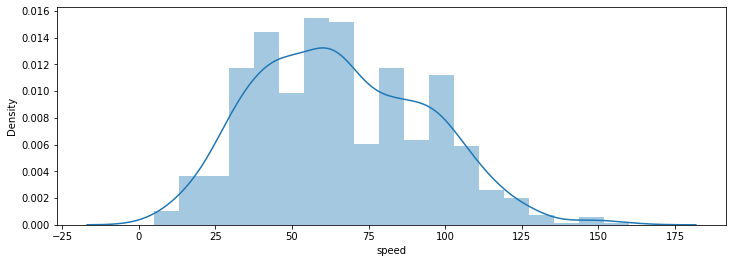

In [30]:
#older version distplot.
sns.distplot(pokemon['speed'])

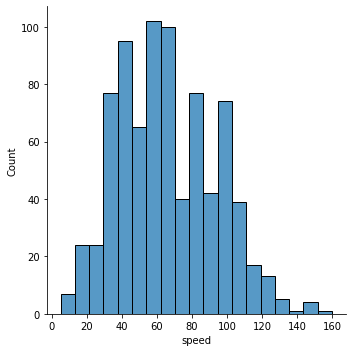

In [31]:
#newer version distplot
sns.displot(pokemon.speed, kind = 'hist')

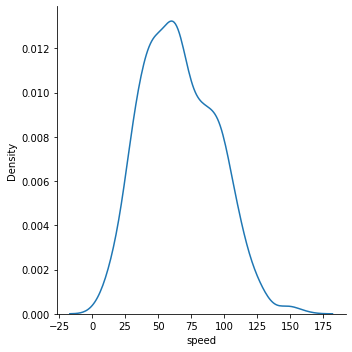

In [32]:
sns.displot(pokemon.speed, kind = 'kde')